# Homework 3 - Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Pairwise Correlations

In [341]:
"""
Putting all the imports in one place for ease of access

"""
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.metrics import make_scorer
from sklearn.model_selection import permutation_test_score
from sklearn.metrics import accuracy_score
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from collections import OrderedDict
from sklearn.decomposition import PCA
from nltk.cluster.kmeans import KMeansClusterer
from xgboost import plot_importance
import xgboost
import collections
import statistics
import math
import numpy as np
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# %matplotlib inline

In [342]:
data_df = pd.read_csv("./data/train.csv")

In [343]:
data_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


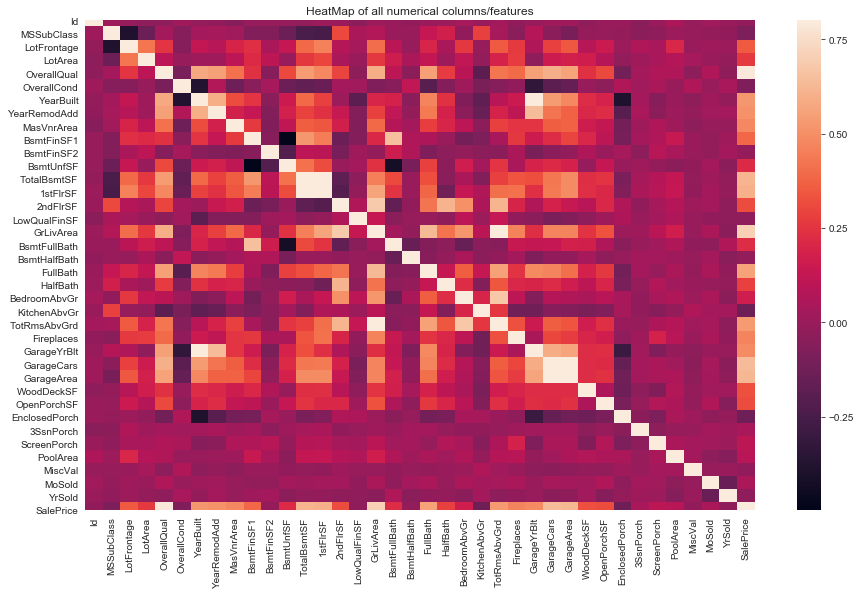

In [344]:
"""
Plotting correlation for all numeric variables

"""
corr = data_df.corr()
fig, ax = plt.subplots(figsize=(15, 9))
plt.title("HeatMap of all numerical columns/features")
sns.heatmap(corr, vmax = 0.8)

In [345]:
"""
Since only numeric values are plotted on heatmap, those will be the numeric features

"""
numerical_features = list(corr.columns)
categorical_features = [col for col in list(data_df.columns) if col not in numerical_features]

# print(len(numerical_features))
# print(len(categorical_features))
# print(len(list(data_df.columns)))

print("Number of features considered: ", len(corr.columns), "\n")
top_corr = corr.nlargest(15, "SalePrice")["SalePrice"]
min_corr = corr.nsmallest(15, "SalePrice")["SalePrice"]
print("Highest correlated features:")
print(top_corr, "\n")
print("Lowest correlated features:")
print(min_corr)

Number of features considered:  38 

Highest correlated features:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64 

Lowest correlated features:
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
Name: SalePrice, dtype: float64


### Encoding categorical features


A custom encoding is done here so that we can represent a more meaningful data in the graphs and analysis.

Suppose if the LabelEncoder encoded the value "Ex" representing Excellent quality as 0, then it wouldn't be a true measure of what it's supposed to mean.

In [346]:
data_df = pd.read_csv("./data/train.csv")
encoded = 0

In [347]:
encoded = 0

""" 
Encoded List - GarageQual, BsmtQual, HeatingQC, CentralAir, KitchenQual, FireplaceQu, PoolQC

"""
encoded_categorical = ["GarageQual", "BsmtQual", "HeatingQC", \
                       "CentralAir", "KitchenQual", "FireplaceQu", "PoolQC"]

# so that we don't encode again and again when we run the code
if encoded == 0:
    # GarageQual
    encode_dict = {
        "Ex" : 6,
        "Gd" : 5,
        "TA" : 4,
        "Fa" : 3,
        "Po" : 2,
        "NA" : 1
    }

    data_df["GarageQual"] = data_df.GarageQual.map(encode_dict)

    # BsmtQual
    encode_dict = {
        "Ex" : 6,
        "Gd" : 5,
        "TA" : 4,
        "Fa" : 3,
        "Po" : 2,
        "NA" : 1
    }

    data_df["BsmtQual"] = data_df.BsmtQual.map(encode_dict)

    # HeatingQC
    encode_dict = {
        "Ex" : 5,
        "Gd" : 4,
        "TA" : 3,
        "Fa" : 2,
        "Po" : 1
    }

    data_df["HeatingQC"] = data_df.HeatingQC.map(encode_dict)

    # CentralAir
    encode_dict = {
        "N" : 0,
        "Y" : 1
    }

    data_df["CentralAir"] = data_df.CentralAir.map(encode_dict)

    # KitchenQual
    encode_dict = {
        "Ex" : 5,
        "Gd" : 4,
        "TA" : 3,
        "Fa" : 2,
        "Po" : 1
    }

    data_df["KitchenQual"] = data_df.KitchenQual.map(encode_dict)

    # FireplaceQu
    encode_dict = {
        "Ex" : 6,
        "Gd" : 5,
        "TA" : 4,
        "Fa" : 3,
        "Po" : 2,
        "NA" : 1
    }

    data_df["FireplaceQu"] = data_df.FireplaceQu.map(encode_dict)

    # PoolQC
    encode_dict = {
        "Ex" : 5,
        "Gd" : 4,
        "TA" : 3,
        "Fa" : 2,
        "NA" : 1,
        "NaN": -999
    }

    data_df["PoolQC"] = data_df.PoolQC.map(encode_dict)

encoded = 1

In [348]:
"""
Old approach to encode all features for the graphs

"""

# from sklearn.preprocessing import LabelEncoder

# # encode all categorical features
# # use label encoding so that number of columns do not increase
# encoded_data_df = data_df.copy()
# # OverallQual, GarageQual, BsmtQual, HeatingQC, CentralAir, KitchenQual, FireplaceQu, PoolQC
# print(categorical_features)
# for cat in categorical_features:
#     encoded_data_df[cat] = LabelEncoder().fit_transform(encoded_data_df[cat].astype(str))

'\nOld approach to encode all features for the graphs\n\n'

In [349]:
"""
The final encoded dataframe

"""

encoded_df = data_df[numerical_features + encoded_categorical + ["Neighborhood"]]
encoded_df["Neighborhood"] = LabelEncoder().fit_transform(encoded_df["Neighborhood"].astype(str))
# print(encoded_df["Neighborhood"])

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [350]:
encoded_df.shape

(1460, 46)

In [351]:
corr2 = encoded_df.corr()
print("Number of features now being considered", len(corr2.columns))

# gives the top 15 most correlated features
new_top_corr = corr2.nlargest(15, "SalePrice")["SalePrice"]

# gives the top 15 least or negatively correlated features
new_min_corr = corr2.nsmallest(15, "SalePrice")["SalePrice"]

top_diff = [col for col in new_top_corr.index if col not in top_corr.index]
min_diff = [col for col in new_min_corr.index if col not in min_corr.index]

print("Features now added to most correlated features after custom encoding", top_diff)
print("Features now added to least correlated features after custom encoding", min_diff)

Number of features now being considered 46
Features now added to most correlated features after custom encoding ['KitchenQual', 'BsmtQual']
Features now added to least correlated features after custom encoding ['GarageQual']


In [352]:
print(new_top_corr, "\n")
print(new_min_corr)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
KitchenQual     0.659600
BsmtQual        0.644019
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Name: SalePrice, dtype: float64 

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
GarageQual       0.156693
Name: SalePrice, dtype: float64


In [353]:
# corr3 = data_df[list(new_top_corr.index)].corr()
# fig, ax = plt.subplots(figsize=(10, 7))
# plt.title("HeatMap of top correlation columns")
# sns.heatmap(corr3, vmax = 0.8)

Number of features considered:  13


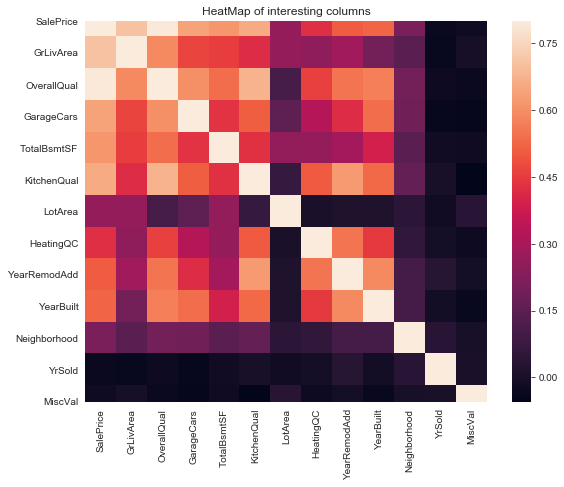

In [354]:
"""
Likely important cols contains the features that I thought were important for predicting SalePrices

"""
likely_imp_cols = ["SalePrice", "GrLivArea", "OverallQual", "GarageCars", "TotalBsmtSF", "KitchenQual", \
                    "LotArea", "HeatingQC", "YearRemodAdd", "YearBuilt", "Neighborhood", "YrSold", "MiscVal"]

print("Number of features considered: ", len(likely_imp_cols))

corr3 = encoded_df[likely_imp_cols].corr()
fig, ax = plt.subplots(figsize=(9, 7))
plt.title("HeatMap of interesting columns")
# print(corr3["Neighborhood"])
sns.heatmap(corr3, vmax = 0.8)

In [355]:
corr3

,SalePrice,GrLivArea,OverallQual,GarageCars,TotalBsmtSF,KitchenQual,LotArea,HeatingQC,YearRemodAdd,YearBuilt,Neighborhood,YrSold,MiscVal
SalePrice,1.000000,0.708624,0.790982,0.640409,0.613581,0.659600,0.263843,0.427649,0.507101,0.522897,0.210851,-0.028923,-0.021190
GrLivArea,0.708624,1.000000,0.593007,0.467247,0.454868,0.420563,0.263116,0.254644,0.287389,0.199010,0.148266,-0.036526,-0.002416
OverallQual,0.790982,0.593007,1.000000,0.600671,0.537808,0.673331,0.105806,0.457083,0.550684,0.572323,0.196593,-0.027347,-0.031406
GarageCars,0.640409,0.467247,0.600671,1.000000,0.434585,0.509810,0.154871,0.325347,0.420622,0.537850,0.194063,-0.039117,-0.043080
TotalBsmtSF,0.613581,0.454868,0.537808,0.434585,1.000000,0.432630,0.260833,0.265682,0.291066,0.391452,0.147762,-0.014969,-0.018479
KitchenQual,0.659600,0.420563,0.673331,0.509810,0.432630,1.000000,0.067864,0.504228,0.625316,0.530165,0.167797,0.002047,-0.054095
LotArea,0.263843,0.263116,0.105806,0.154871,0.260833,0.067864,1.000000,0.003581,0.013788,0.014228,0.044569,-0.014261,0.038068
HeatingQC,0.427649,0.254644,0.457083,0.325347,0.265682,0.504228,0.003581,1.000000,0.550017,0.448855,0.056031,-0.009649,-0.026872
YearRemodAdd,0.507101,0.287389,0.550684,0.420622,0.291066,0.625316,0.013788,0.550017,1.000000,0.592855,0.102671,0.035743,-0.010286
YearBuilt,0.522897,0.199010,0.572323,0.537850,0.391452,0.530165,0.014228,0.448855,0.592855,1.000000,0.101289,-0.013618,-0.034383


### Correlations calculated -
1. Only numerical features were used to calculate this correlation.
2. Numerical + some encoded categorical features were used to calculate the new correlation.
3. Correlation for some interesting features was seen here to get information about the data to be used in later steps.

### Features correlated with SalePrice -
OverallQual, GrLivArea, GarageCars, TotalBsmtSF, 1stFlrSF are some of the features having a high positive correlation with SalePrice.

Very few features have a negative correlation with SalePrice and that too is a very low value.

The most and least correlated features were found using "nsmallest" and "nlargest" functions for correlation.

### Correlation between features -
After looking at the HeatMap of interesting columns, OverallQual has a high correlation with YearBuilt as should be expected. Neighborhood suprisingly has a low correlation with other features as well as with SalePrice. 

MiscVal was also having a very low correlation with all the features considered.

GarageCars is also highly correlated with SalePrice and OverallQual suggesting that it's an important feature while evaluating the cost of a house. 

OverallQual and SalePrice have almost the same correlations with other features.

## Part 2 - Informative Plots

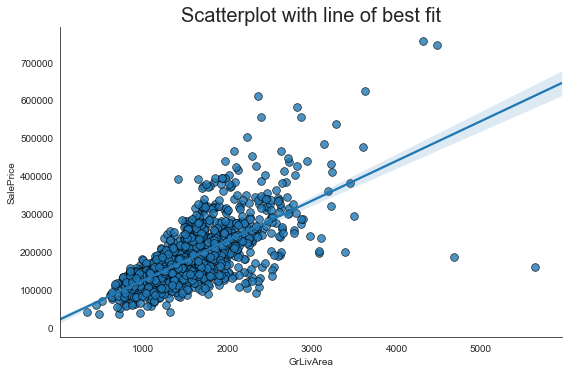

In [356]:
"""
Scatter plot between above ground living area and SalePrice

"""
sns.set_style("white")
gridobj = sns.lmplot(x="GrLivArea", y="SalePrice", data=data_df,
                     aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

plt.title("Scatterplot with line of best fit", fontsize=20)
plt.show()

GrLivArea is increasing as SalePrice of a house increases. They have a linear relation between them.

This suggests that area is a key feature in calculating the SalePrice of a house/property.

As the living area increases, the number of utilitites as well as cost of painting, cleaning, maintaining, etc. increases which leads to a conseqeunt increase in the valuation of the property i.e. the SalePrice.

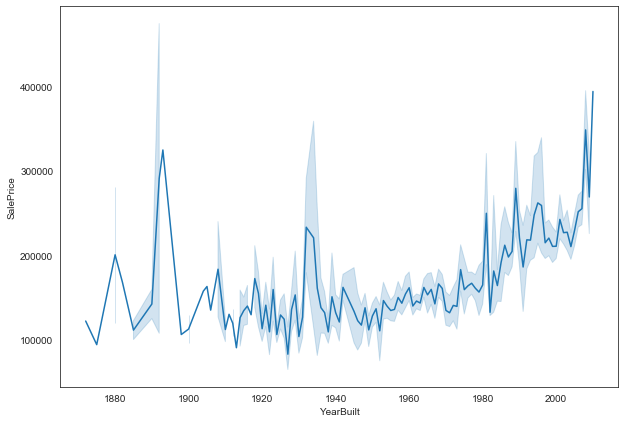

In [357]:
"""
A line plot between SalePrice and YearBuilt

"""
plt.figure(figsize=(10,7))
data = pd.concat([data_df['SalePrice'], data_df['YearBuilt']], axis=1)
sns.lineplot(x="YearBuilt", y="SalePrice", data=data)


As a property gets old, one of two things can happen -
1. The SalePrice of the property can increase if it's kept in a good condition and if people regard it as having some historical importance or,

2. The SalePrice of the property goes down because it is not in a condition which appeals to a potential buyer.

This is why we se a zig-zag graph with the sale price fluctuating a bit with time.

But, the overall SalePrice of all houses has increased over time.

The huge peaks in SalePrice for old properties is mostly due to their historical significance.

Also, properties of old times are usually huge in size and most of them are mansions which if maintained properly can be sold at huge costs which explains the peaks.

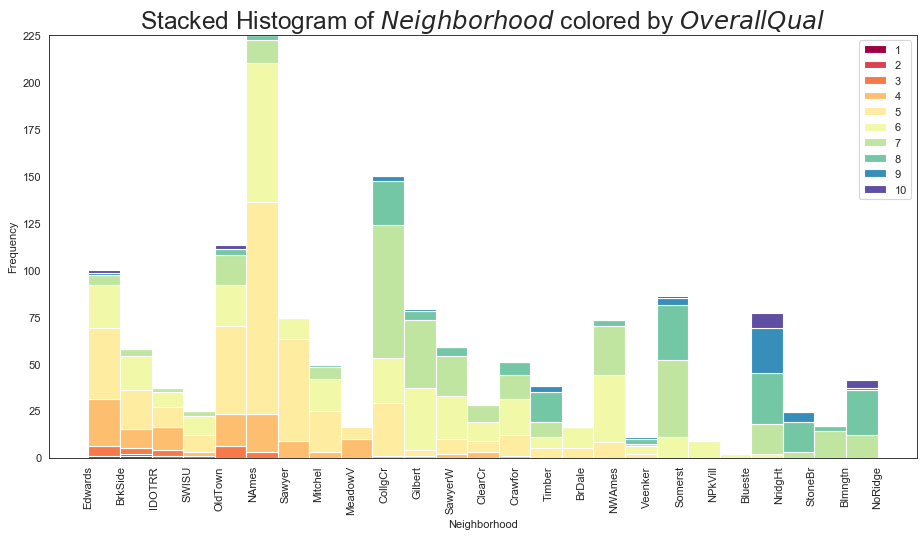

In [358]:
"""
Stacked Histograms for Neighborhoods grouped by OverallQual

"""
# x_var = "OverallQual"
# groupby_var = "Neighborhood"

x_var = "Neighborhood"
groupby_var = "OverallQual"

df_agg = data_df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(14,7), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, data_df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(data_df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.xticks(rotation=90)
plt.ylabel("Frequency")
# plt.ylim(0, 80)
# plt.xticks(ticks=bins, labels=np.unique(data_df[x_var]).tolist(), rotation=90, horizontalalignment='left')
plt.show()

In [359]:
data_df["Neighborhood"].unique()[10]
# index 10

'NridgHt'

It can be seen that the quality of properties has a wide range in each neighborhood suggesting that the neighborhood has a very small effect on the overall quality of the house. 

People do not take it into consideration much these days while buying a house. 

Only the neighborhood "NrdigHt" i.e. Northridge Heights has an exceptionally high quality as compared to the other neighborhoods.

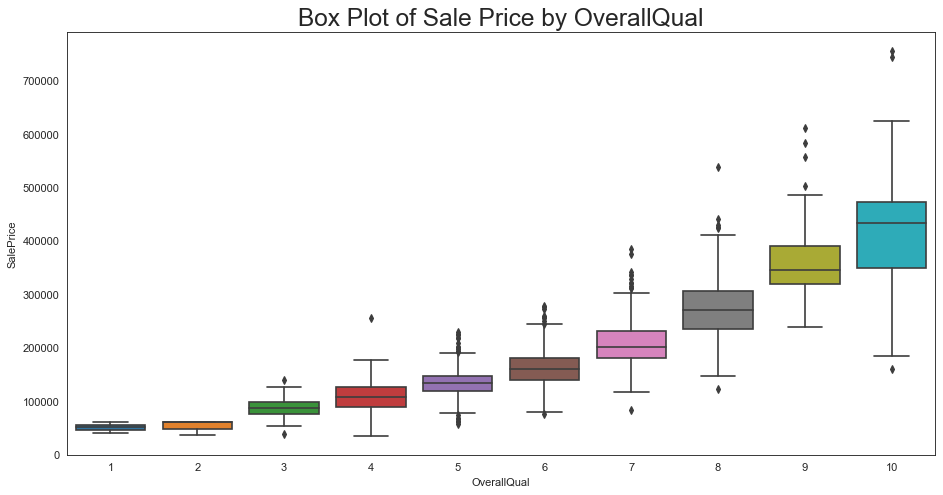

In [360]:
"""
Box Plot of Sale Price by OverallQual

"""
x_var = "OverallQual"
y_var = "SalePrice"
plt.figure(figsize=(14,7), dpi= 80)
sns.boxplot(x=x_var, y=y_var, data=data_df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(data_df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in data_df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = data_df.groupby(group_col)[y].size().values

add_n_obs(data_df,group_col=x_var,y=y_var)    

plt.title('Box Plot of Sale Price by OverallQual', fontsize=22)
plt.show()

The medians as well as interquartile ranges of SalePrice are increasing with the increase in OverallQual.

This suggests that even as OverallQual increases, the range of SalePrice is also high and there are properties having low SalePrices with a high rating of Overall Quality.

But, the general trend of increase in SalePrice with Quality cannot be overlooked.

These features have an almost linear relationship.

OverallQual is indeed an important feature in predicting the SalePrice.

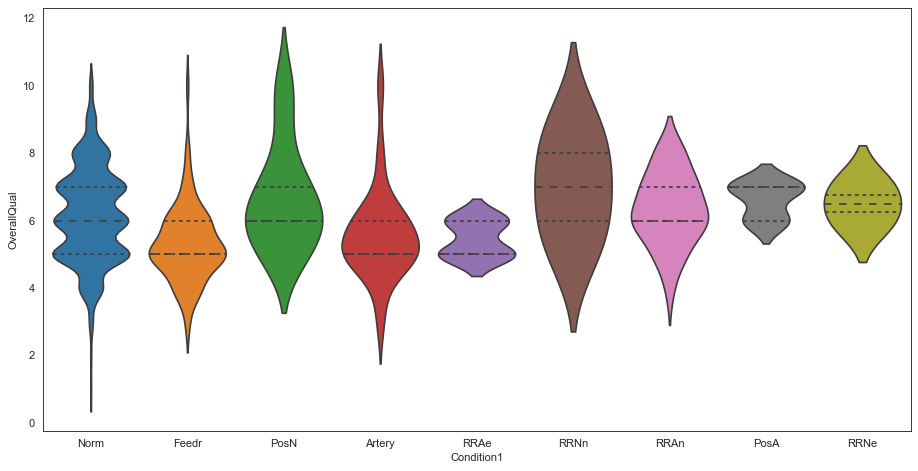

In [361]:
"""
Violin Plot

"""
plt.figure(figsize=(14,7), dpi= 80)
sns.violinplot(x='Condition1', y='OverallQual', data=data_df, scale='width', inner='quartile')
plt.show()

Proximity to the shown conditions does not affect the Overall Quality much.

All the conditions have almost the same range of OverallQual and hence it's not affecting the quality of the property.

Even then, some conditions affect more than the others to the Overall quality.

It can also be due to a random variance in data completely independent of the conditions.

## Part 3 - Handcrafted Scoring Function

In [362]:
encoded_df = data_df.copy()[numerical_features + encoded_categorical]

encode_dict = {
        "AllPub" : 4,
        "NoSewr" : 3,
        "NoSeWa" : 2,
        "ELO" : 1,
    }

encoded_df = encoded_df.drop(["SalePrice"], axis = 1)
encoded_df["Utilities"] = data_df.Utilities.map(encode_dict)

# print(encoded_df.columns)

SalePrice won't be considered here because desirability isn't based on how costly a house is.

There can be a nice big house with a big garage and good heating which is as costly as some other
small apartment in a costly city.

We'll be giving different weights to all variables being considered here

In [363]:
"""
Assign higher weights to some columns 

"""
desirable_cols_with_weights = {"GrLivArea": 30, "OverallQual": 30, "TotalBsmtSF": 30, "GarageCars": 30, \
                        "LotArea": 15, "HeatingQC": 10, "KitchenQual": 30, "Utilities": 10, "1stFlrSF": 30}

weights = np.array(list(desirable_cols_with_weights.values()))

weights = weights/sum(weights)

desirable_df = encoded_df[desirable_cols_with_weights.keys()]

# has_NaN = (pd.isnull(desirable_df).sum() > 0)
# print(has_NaN[has_NaN == True])


"""
Normalize all the columns in desirable_df

Using z-score because lower the value of a column from it's mean is, lower is the desirability
Hence, z-score for these values will be negative and our desirability function will work better

"""
normalized_df = pd.DataFrame()

for col in desirable_cols_with_weights.keys():
    normalized_df[col] = (desirable_df[col] - desirable_df[col].mean())/desirable_df[col].std(ddof=0)

# print(normalized_df.iloc[0])
# print(sum(weights))
# print(weights)

In [364]:
"""
Main desirability function

"""
def get_desirability(data_series):
#     print(data_series)
    desirability = sum(data_series[list(desirable_cols_with_weights.keys())].values * weights)
    return desirability

In [365]:
desirability_scores_dict = {}

# Where the key is the index location of the property in the DataFrame
for i in range(len(normalized_df)):
    desirability_scores_dict[i] = get_desirability(normalized_df.iloc[i])

print("Minimum desirability score: ", min(desirability_scores_dict.values()))
print("Maximum desirability score: ", max(desirability_scores_dict.values()))
# print(len(desirability_scores_dict.values()))

Minimum desirability score:  -2.2534494485503958
Maximum desirability score:  5.1440447985330415


### Ideally even without considering the SalePrice for calculating desirability, there should be a good correlation between the desirability score and the SalePrice

In [366]:
desirability_df = pd.DataFrame(np.array(list(desirability_scores_dict.values())), columns = ["Desirability"])
desirability_df["SalePrice"] = data_df["SalePrice"]

# print(len(desirability_df["Desirability"]))

desirability_df.corr()

,Desirability,SalePrice
Desirability,1.000000,0.867159
SalePrice,0.867159,1.000000


In [367]:
desirability_df.describe()

,Desirability,SalePrice
count,1.460000e+03,1460.000000
mean,4.866731e-17,180921.195890
std,6.918766e-01,79442.502883
min,-2.253449e+00,34900.000000
25%,-5.070740e-01,129975.000000
50%,-9.247797e-02,163000.000000
75%,3.993229e-01,214000.000000
max,5.144045e+00,755000.000000


In [368]:
"""
Get the 10 least and most desirable houses

"""
desirability_scores_sorted = list(sorted(desirability_scores_dict.items(), key=lambda x: x[1], reverse = True))

# print(len(desirability_scores))
# print(desirability_scores)

most_desirable_house_indexes = list(OrderedDict(desirability_scores_sorted[:10]).keys())
least_desirable_house_indexes = list(OrderedDict(desirability_scores_sorted[-10:]).keys())[::-1]
# print(most_desirable_house_indexes)

In [369]:
data_df = pd.read_csv("./data/train.csv")

most_desirable_df = pd.DataFrame()

for i in most_desirable_house_indexes:
    most_desirable_df = most_desirable_df.append(data_df.iloc[i])

rearrange_order = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageCars', 'LotArea', 'BsmtFullBath', \
                   'BedroomAbvGr', 'HeatingQC', 'KitchenQual', 'Utilities', '1stFlrSF', 'TotRmsAbvGrd']

final_order = rearrange_order + (list(set(most_desirable_df) - set(rearrange_order)))

most_desirable_df = most_desirable_df[final_order]

print(most_desirable_df.describe())
print("First row is most desirable with the desirability decreasing down the row")
most_desirable_df

         GrLivArea  OverallQual  TotalBsmtSF  GarageCars        LotArea  \
count    10.000000    10.000000    10.000000   10.000000      10.000000   
mean   3542.800000     9.500000  2947.300000    2.700000   44513.900000   
std    1201.370495     1.080123  1191.726483    0.483046   62273.486476   
min    2036.000000     7.000000  1930.000000    2.000000   11400.000000   
25%    2459.750000    10.000000  2393.000000    2.250000   13961.750000   
50%    3427.500000    10.000000  2538.500000    3.000000   18579.000000   
75%    4436.000000    10.000000  3127.000000    3.000000   39010.500000   
max    5642.000000    10.000000  6110.000000    3.000000  215245.000000   

       BsmtFullBath  BedroomAbvGr     1stFlrSF  TotRmsAbvGrd  EnclosedPorch  \
count     10.000000     10.000000    10.000000     10.000000       10.00000   
mean       1.000000      3.200000  2720.700000      9.700000       29.10000   
std        0.666667      0.788811   814.294384      1.337494       92.02228   
min     

,GrLivArea,OverallQual,TotalBsmtSF,GarageCars,LotArea,BsmtFullBath,BedroomAbvGr,HeatingQC,KitchenQual,Utilities,...,OpenPorchSF,BsmtFinType1,ScreenPorch,BsmtUnfSF,3SsnPorch,KitchenAbvGr,ExterQual,RoofStyle,MSZoning,SaleType
1298,5642.0,10.0,6110.0,2.0,63887.0,2.0,3.0,Ex,Ex,AllPub,...,292.0,GLQ,0.0,466.0,0.0,1.0,Ex,Hip,RL,New
523,4676.0,10.0,3138.0,3.0,40094.0,1.0,3.0,Ex,Ex,AllPub,...,406.0,GLQ,0.0,878.0,0.0,1.0,Ex,Hip,RL,New
691,4316.0,10.0,2444.0,3.0,21535.0,0.0,4.0,Ex,Ex,AllPub,...,50.0,GLQ,0.0,989.0,0.0,1.0,Ex,Gable,RL,WD
1182,4476.0,10.0,2396.0,3.0,15623.0,1.0,4.0,Ex,Ex,AllPub,...,78.0,GLQ,0.0,300.0,0.0,1.0,Gd,Hip,RL,WD
440,2402.0,10.0,3094.0,3.0,15431.0,1.0,2.0,Ex,Ex,AllPub,...,72.0,GLQ,170.0,788.0,0.0,1.0,Ex,Hip,RL,WD
1373,2633.0,10.0,2633.0,3.0,11400.0,1.0,2.0,Ex,Ex,AllPub,...,140.0,GLQ,0.0,1351.0,0.0,1.0,Ex,Hip,RL,WD
496,3228.0,8.0,3200.0,2.0,12692.0,1.0,4.0,Ex,Gd,AllPub,...,75.0,GLQ,0.0,1969.0,0.0,1.0,Gd,Hip,RL,WD
313,2036.0,7.0,2136.0,2.0,215245.0,2.0,3.0,TA,TA,AllPub,...,0.0,ALQ,0.0,80.0,0.0,1.0,TA,Hip,RL,WD
224,2392.0,10.0,2392.0,3.0,13472.0,0.0,3.0,Ex,Ex,AllPub,...,105.0,GLQ,0.0,2336.0,0.0,1.0,Ex,Hip,RL,WD
1169,3627.0,10.0,1930.0,3.0,35760.0,1.0,4.0,Ex,Gd,AllPub,...,76.0,GLQ,0.0,543.0,0.0,1.0,Gd,Hip,RL,WD


In [370]:
least_desirable_df = pd.DataFrame()

for i in least_desirable_house_indexes:
    least_desirable_df = least_desirable_df.append(data_df.iloc[i])

rearrange_order = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageCars', 'LotArea', 'BsmtFullBath', \
                   'BedroomAbvGr', 'HeatingQC', 'KitchenQual', 'Utilities', '1stFlrSF', 'TotRmsAbvGrd']

final_order = rearrange_order + (list(set(least_desirable_df) - set(rearrange_order)))

least_desirable_df = least_desirable_df[final_order]

print(least_desirable_df.describe())
print("First row is least desirable with the desirability increasing down the row")
least_desirable_df

         GrLivArea  OverallQual  TotalBsmtSF  GarageCars       LotArea  \
count    10.000000    10.000000    10.000000   10.000000     10.000000   
mean    731.300000     3.000000   416.900000    0.500000   7428.700000   
std     315.124684     1.632993   280.958459    0.707107   3089.757058   
min     334.000000     1.000000     0.000000    0.000000   4118.000000   
25%     490.000000     2.000000   270.500000    0.000000   5397.500000   
50%     700.500000     3.000000   450.000000    0.000000   6222.000000   
75%     878.000000     4.000000   642.250000    1.000000   8850.000000   
max    1344.000000     6.000000   819.000000    2.000000  14375.000000   

       BsmtFullBath  BedroomAbvGr     1stFlrSF  TotRmsAbvGrd  EnclosedPorch  \
count     10.000000     10.000000    10.000000     10.000000      10.000000   
mean       0.200000      1.600000   659.300000      4.400000       8.700000   
std        0.421637      0.843274   305.665776      1.577621      27.511816   
min        0.0000

,GrLivArea,OverallQual,TotalBsmtSF,GarageCars,LotArea,BsmtFullBath,BedroomAbvGr,HeatingQC,KitchenQual,Utilities,...,OpenPorchSF,BsmtFinType1,ScreenPorch,BsmtUnfSF,3SsnPorch,KitchenAbvGr,ExterQual,RoofStyle,MSZoning,SaleType
533,334.0,1.0,0.0,0.0,5000.0,0.0,1.0,Fa,Fa,AllPub,...,0.0,NaN,0.0,0.0,0.0,1.0,Fa,Gable,RL,WD
636,800.0,2.0,264.0,0.0,6120.0,0.0,1.0,Fa,Fa,AllPub,...,0.0,Unf,0.0,264.0,0.0,1.0,Fa,Gable,RM,ConLw
1100,438.0,2.0,290.0,1.0,8400.0,0.0,1.0,TA,Fa,AllPub,...,0.0,Rec,0.0,0.0,0.0,1.0,TA,Gable,RL,WD
705,1092.0,4.0,0.0,0.0,5600.0,0.0,3.0,Fa,Fa,AllPub,...,0.0,NaN,0.0,0.0,0.0,2.0,Fa,Hip,RM,WD
944,1344.0,6.0,819.0,2.0,14375.0,0.0,3.0,Gd,Gd,NoSeWa,...,118.0,GLQ,233.0,354.0,0.0,1.0,TA,Gable,RL,COD
375,904.0,1.0,683.0,0.0,10020.0,1.0,1.0,Gd,Fa,AllPub,...,0.0,BLQ,0.0,333.0,0.0,1.0,Fa,Gable,RL,WD
1337,693.0,4.0,693.0,0.0,4118.0,0.0,2.0,Fa,Fa,AllPub,...,20.0,Unf,0.0,693.0,0.0,1.0,TA,Gable,RM,WD
1323,708.0,4.0,420.0,0.0,5330.0,0.0,2.0,Gd,Fa,AllPub,...,0.0,LwQ,0.0,140.0,0.0,1.0,Fa,Hip,RL,WD
29,520.0,4.0,520.0,1.0,6324.0,0.0,1.0,Fa,Fa,AllPub,...,0.0,Unf,0.0,520.0,0.0,1.0,TA,Gable,RM,WD
916,480.0,2.0,480.0,1.0,9000.0,1.0,1.0,TA,TA,AllPub,...,0.0,BLQ,0.0,430.0,0.0,1.0,TA,Gable,C (all),WD


### Definition of desirability -
A desirable property is considered here as the one having all the amenities a person would want in a dream house with a large living area, large garage, etc.
Hence, SalePrice isn't considered in the desirability score function.

### Explanation -
The features considered here for calculating desirability score are :
'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageCars', 'LotArea', 'HeatingQC', 'KitchenQual', 'Utilities', '1stFlrSF'

Usually a dream house would be a one having a great quality rating, huge living area, huge garage, huge basement for storage or other uses, a good heater, great kitchen and utilities.

A score would be the sum of values of all these features. But, before taking the sum, we need to convert these values to a similar scale so that we get a uniform and more sensible score. Some variables can have a very high value which adds more weight to the score eg. TotalBsmtSF = 2300 with an OverallQual value of 2 whereas for another property having a low TotalBsmtSF of 500 but an OverallQual of 10, the scores calculated will now favour the first property because of the high Area value.

Hence, we scaled the data and converted them to their z-score values.

Since a desirable house will obviously have a high value for all the features considered, it will be above the mean and hence will have a positive z-score. Now due to scaling, properties which have some features below the mean will have a negative z-score which when we take a sum of all feature values for a property will result in a lower score. This works in our favour.

Finally, a weight is given to all the features depending on their importance in finding desirability.

The final score will be the weighted sum of all the values of features for a particular property.

The desirability value should also correlate with SalePrice to some extent as most of the dream properties are bound to be costly. Hence, as the desirability score increases, so should it's SalePrice. Which is what is happening in this case.

All the properties predicted as most desirable have a 9 or 10 OverallQual, large living area as well as the number of rooms above ground and garage cars. All of these point to a very lavish and posh property which is what we wanted. 

All the properties predicted as least desirable have a 1-3 OverallQual, small living area, low number of rooms above ground and garage cars. The lotArea and other features also have very low values which is what a low desirable property would have.  

Almost all the features which we have given higher weights as well as other important features are the highest values for most 
desirable and the lowest for least desirable.

Hence the desirability function seems to be working for most desirable properties as well as least desirable properties.


## Part 4 - Pairwise Distance Function

In [371]:
dist_data_df = pd.read_csv("./data/train.csv")

neighborhoods_with_ids = dist_data_df[["Neighborhood", "Id"]]

"""
The location dict has index for all features

"""
variable_locations = {}

i = 0
for var in dist_data_df.columns:
    variable_locations[var] = i
    i += 1
    
# print(variable_locations)

"""
First convert all categorical features into numbers so that we can use a distance function

We'll first try it by making vectors of all rows and then finding similarity using cosine similarity

"""

# label encoding categorical variables will work here because we just need to see if two values differ
# print(categorical_features)

"""
Remove neighborhood right now along with columns having NaN, so that the 

normalized data frame/numpy array can be used directly for clustering

"""
dist_data_df = dist_data_df.drop(["LotFrontage", "MasVnrArea", "GarageYrBlt", "Neighborhood"], axis = 1)

categorical_features_new = list(categorical_features)
categorical_features_new.remove("Neighborhood")

for cat in categorical_features_new:
    dist_data_df[cat] = LabelEncoder().fit_transform(dist_data_df[cat].astype(str))


In [372]:
"""
Check how many columns now have NaN

"""
# print(dist_data_df.shape)
# has_NaN = (pd.isnull(dist_data_df).sum() > 0)
# print(has_NaN[has_NaN == True])

# print(dist_data_df["LotFrontage"].isna().sum())
# print(dist_data_df["MasVnrArea"].isna().sum())
# print(dist_data_df["GarageYrBlt"].isna().sum())

'\nCheck how many columns now have NaN\n\n'

### Give high weights for high value columns

In [406]:
likely_imp_cols = ["SalePrice", "GrLivArea", "OverallQual", "TotalBsmtSF", "YearBuilt", "GarageCars", "LotArea", "HeatingQC", "KitchenQual", "MiscVal", "YearRemodAdd", "YrSold"]
# print(len(likely_imp_cols))

columns = list(dist_data_df.columns)

weights = np.array([10 for i in range(len(dist_data_df.columns))])

for col in likely_imp_cols:
    index = columns.index(col)
    weights[index] = 40

weights = weights/sum(weights)
print("Sum of weights: ", sum(weights))
print(weights)

Sum of weights:  0.9999999999999993
[0.00854701 0.00854701 0.00854701 0.00854701 0.03418803 0.00854701
 0.00854701 0.00854701 0.00854701 0.00854701 0.00854701 0.00854701
 0.00854701 0.00854701 0.00854701 0.00854701 0.00854701 0.03418803
 0.00854701 0.03418803 0.03418803 0.00854701 0.00854701 0.00854701
 0.00854701 0.00854701 0.00854701 0.00854701 0.00854701 0.00854701
 0.00854701 0.00854701 0.00854701 0.00854701 0.00854701 0.00854701
 0.00854701 0.00854701 0.03418803 0.00854701 0.03418803 0.00854701
 0.00854701 0.00854701 0.00854701 0.00854701 0.03418803 0.00854701
 0.00854701 0.00854701 0.00854701 0.00854701 0.00854701 0.03418803
 0.00854701 0.00854701 0.00854701 0.00854701 0.00854701 0.00854701
 0.00854701 0.03418803 0.00854701 0.00854701 0.00854701 0.00854701
 0.00854701 0.00854701 0.00854701 0.00854701 0.00854701 0.00854701
 0.00854701 0.00854701 0.00854701 0.03418803 0.00854701 0.03418803
 0.00854701 0.00854701 0.03418803]


In [374]:
"""
Scale the data so that all values are between 0 to 1

"""
scaler = MinMaxScaler()

dist_data_df = scaler.fit_transform(dist_data_df)

print(type(dist_data_df))

<class 'numpy.ndarray'>


### Below is the main distance function

In [375]:
"""
property1 and property2 are the normalized numpy array
values of the two properties which we want distance for

"""
consider_weights = False

# Maybe if we multiply distance by 10, we'll have a larger range for the clustering function
def get_distance(property_vector_1, property_vector_2):
    distance = 0
    
    # basic distance calculation
    # for value1,value2 in zip(property1, property2):
    #     distance += abs(value1 - value2) * weights[weights_index]
    #     weights_index += 1

    # giving more weights to some columns than others
    if consider_weights == True:
        property_vector_1 = property1 * weights
        property_vector_2 = property2 * weights

    # custom cosine similarity function
    dot = np.dot(property_vector_1, property_vector_2)
    norm_a = np.linalg.norm(property_vector_1)
    norm_b = np.linalg.norm(property_vector_2)
    cosine_similarity = dot / (norm_a * norm_b)
    distance = 1- cosine_similarity
    
    return distance*10

In [376]:
"""
Code for pairwise distances over the whole data

"""
distances = {}

for i in range(0, len(dist_data_df)):
    for j in range(i + 1, len(dist_data_df)):
        distance = 0
        property1 = dist_data_df[i]
        property2 = dist_data_df[j]

        # print(property1, property2)

        distance = get_distance(property1, property2)
        distances[(i, j)] = distance
    
print("Total number of comparisons: ", len(distances))

distances = list(sorted(distances.items(), key=lambda x: x[1], reverse = True))

print("\nMax distances:\n",distances[:10])
print("\nMin distances:\n",distances[-10:][::-1])

Total number of comparisons:  1065070

Max distances:
 [((636, 1182), 4.57215187567503), ((335, 636), 4.425565152557089), ((495, 691), 4.29052589461952), ((88, 1298), 4.283302358527477), ((636, 1298), 4.225871486768323), ((495, 1298), 4.215661420504224), ((916, 1298), 4.170124664725698), ((30, 1298), 4.137486618256122), ((88, 335), 4.106722040175002), ((533, 1182), 4.037071777113692)]

Min distances:
 [((145, 193), 0.0038133331151035676), ((1088, 1304), 0.013215071373678944), ((775, 1193), 0.015505613605313329), ((727, 999), 0.019625166962093932), ((1368, 1422), 0.025660257795886432), ((829, 831), 0.030732035687441872), ((1240, 1410), 0.0312561385387955), ((180, 623), 0.03228219131507282), ((593, 721), 0.033418780591416564), ((790, 1004), 0.03988935529282256)]


In [377]:
"""
Code to check distances for properties in the same neighborhood

"""
dist_df = pd.read_csv("./data/train.csv")

neighborhoods = neighborhoods_with_ids["Neighborhood"].unique()

avg_neighborhood_distances = {}

for neighborhood in neighborhoods:
    indexes = dist_df[dist_df["Neighborhood"] == neighborhood].index
    
    # Calculate the average distance between properties of the same neighborhood
    comparisons = 0
    avg_dist = 0
    for i in range(0, len(indexes)):
        for j in range(i + 1, len(indexes)):
            avg_dist += get_distance(dist_data_df[i], dist_data_df[j])
            comparisons += 1
    avg_dist /= comparisons
    avg_neighborhood_distances[neighborhood] = avg_dist
    print("Num. properties: {}\tNumber of comparisons: {}\t Neighborhood: {}\t Avg. Distance: {}"\
          .format(len(indexes), comparisons, neighborhood, avg_dist))

Num. properties: 150	Number of comparisons: 11175	 Neighborhood: CollgCr	 Avg. Distance: 1.1817239766388876
Num. properties: 11	Number of comparisons: 55	 Neighborhood: Veenker	 Avg. Distance: 1.0052875224862678
Num. properties: 51	Number of comparisons: 1275	 Neighborhood: Crawfor	 Avg. Distance: 1.1646123086097129
Num. properties: 41	Number of comparisons: 820	 Neighborhood: NoRidge	 Avg. Distance: 1.169505114238391
Num. properties: 49	Number of comparisons: 1176	 Neighborhood: Mitchel	 Avg. Distance: 1.180462593095833
Num. properties: 86	Number of comparisons: 3655	 Neighborhood: Somerst	 Avg. Distance: 1.181105591564829
Num. properties: 73	Number of comparisons: 2628	 Neighborhood: NWAmes	 Avg. Distance: 1.1935645251583509
Num. properties: 113	Number of comparisons: 6328	 Neighborhood: OldTown	 Avg. Distance: 1.2164623831301595
Num. properties: 58	Number of comparisons: 1653	 Neighborhood: BrkSide	 Avg. Distance: 1.2044512921853763
Num. properties: 74	Number of comparisons: 2701	 N

In [378]:
"""
Old code to include all non NaN features in distance function

"""
# if there are NaNs in any of the rows, get common non-NaN columns for calculating distance
# if property1.isna().any() or property2.isna().any():
#     property1 = property1.dropna()
#     property2 = property2.dropna()

#     # find common columns
#     common_columns = []
    
#     cols_1 = list(property1.keys())
#     cols_2 = list(property2.keys())
    
#     for col in cols_1:
#         if col in cols_2:
#             common_columns.append(col)
# else:
#     common_columns = list(property1.keys())

'\nOld code to include all non NaN features in distance function\n\n'

We first removed the columns having NaN and the "Neighborhood" column and then encoded all the categorical variables.

We designed a weight vector to which some columns/features were given more weights which I thought defined the properties more clearly than other features and hence could have more impact in judging the similarity of two properties.

The weights are then normalized in a way that their sum is 1, so that they don't give undue advantage to some features.

Next, all the features of the dataframe were normalized using MinMaxScaler so that the distance can be more effectively calculated. 

The difference between the values of features of two properties' might be large but it would have a small effect on the difference between the properties. That is why we have normalized the data here. 

The main distance function takes input as two numpy arrays i.e. the normalized rows of the two properties we want the distance for.

Each array is treated as a distance vector. The vectors are multiplied by the weight vector and then their cosine similarity is calculated. The distance function hence is the cosine similarity. 

The distance will be 1 - cosine similarity value.

When we calculate the distances between all the properties, the max distance found is 4.57 whereas the minimum distance found is 0.0038 which goes to 0.0398 in the least 10 itself which is 10 times the least value.

Therefore the average distance between neighborhoods which comes out to 1.x is a decent score which can be considered as a small distance value relatively.

When we assign more weights to some features, the max and min values don't change much but the average increases by 0.5-0.7

## Part 5 - Clustering

In [379]:
"""
Encode and scale the data for clustering

"""
dist_data_df = pd.read_csv("./data/train.csv")

original_clusters = LabelEncoder().fit_transform(dist_data_df["Neighborhood"].astype(str))

overall_qual = dist_data_df["OverallQual"]

# print(type(original_clusters))

dist_data_df = dist_data_df.drop(["LotFrontage", "MasVnrArea", "GarageYrBlt", "Neighborhood"], axis = 1)

categorical_features_new = list(categorical_features)
categorical_features_new.remove("Neighborhood")

for cat in categorical_features_new:
    dist_data_df[cat] = LabelEncoder().fit_transform(dist_data_df[cat].astype(str))

scaler = MinMaxScaler()

dist_data_df = scaler.fit_transform(dist_data_df)

print(dist_data_df.shape)

# print(original_clusters[0])

(1460, 77)


In [380]:
data = dist_data_df

In [381]:
"""
Code for clustering with custom distance function

"""
NUM_CLUSTERS = 10

kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=get_distance, repeats=1)
assigned_clusters = kclusterer.cluster(data, assign_clusters=True)


In [382]:
"""
Since we have ids for all properties, we have predicted and actual values for all of them

Find counts of correct predictions

"""
correct_predictions = 0

for pred, actual in zip(assigned_clusters, original_clusters):
    if pred == actual:
        correct_predictions += 1
        
print("Number of matching predictions: ", correct_predictions)

Number of matching predictions:  103


This is a bad way to check the accuracy as the cluster number assigned by KMeans won't be the same as the neighborhood number.

In [383]:
"""
This code is used when,

number of clusters = number of neighborhoods = 25 

It does not hold much significance otherwise

This section works on the assumption that the order of frequencies/counts per neighborhood
should be similar in the original data as well as predicted data.

This is also a bad measure of accuracy.

"""

# counter_original = collections.Counter(original_clusters)
# print(counter_original)
# print("\n")

# counter_predicted = collections.Counter(assigned_clusters)
# print(counter_predicted)

# differences = []
# for c1, c2 in zip(counter_original.values(), counter_predicted.values()):
#     differences.append(abs(c1-c2))

# print("\n")
# print(differences)
# print("Avg variation: ", statistics.mean(differences))

'\nThis code is used when,\n\nnumber of clusters = number of neighborhoods = 25 \n\nIt does not hold much significance otherwise\n\nThis section works on the assumption that the order of frequencies/counts per neighborhood\nshould be similar in the original data as well as predicted data.\n\nThis is also a bad measure of accuracy.\n\n'

In [384]:
# data = dist_data_df

# decomposed_df = PCA(n_components=2).fit(data)
# decomposed_df = decomposed_df.transform(data)

# # len(pca_2d)

# fig = plt.figure(figsize=[8,8])
# ax = fig.add_subplot(111)
# scatter = ax.scatter(x=decomposed_df[:,0], y=decomposed_df[:,1], c=overall_qual, s=20)
# plt.colorbar(scatter)
# fig.show()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


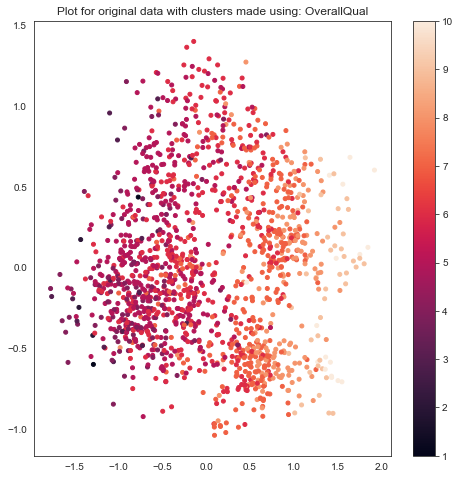

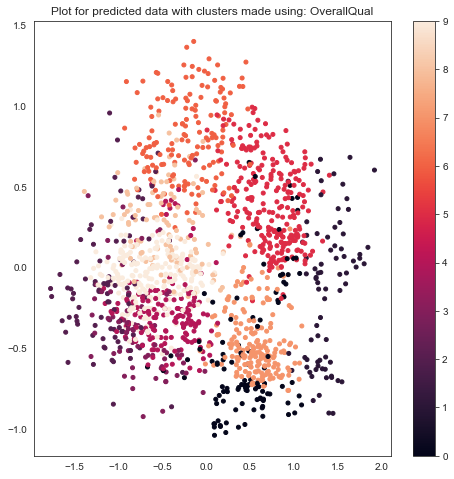

In [385]:
"""
Code for plotting scatterplot for actual points and predicted cluster values 
with respect to the clustering feature eg. OverallQual or Neighborhood

PCA was used to help us plot a scatter plot with 2 dimensions 

"""
decomposed_df = PCA(n_components=2).fit(data)
decomposed_df = decomposed_df.transform(data)

feature_used = "OverallQual"

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111)
scatter = ax.scatter(x=decomposed_df[:,0], y=decomposed_df[:,1], c=overall_qual, s=16)
plt.colorbar(scatter)
# plt.subplot(1, 2, 1)
# fig.tight_layout()
plt.title("Plot for original data with clusters made using: " + feature_used)
fig.show()

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111)
scatter = ax.scatter(x=decomposed_df[:,0], y=decomposed_df[:,1], c=assigned_clusters, s=16)
plt.colorbar(scatter)
# plt.subplot(1, 2, 2)
# fig.tight_layout()
plt.title("Plot for predicted data with clusters made using: " + feature_used)
fig.show()

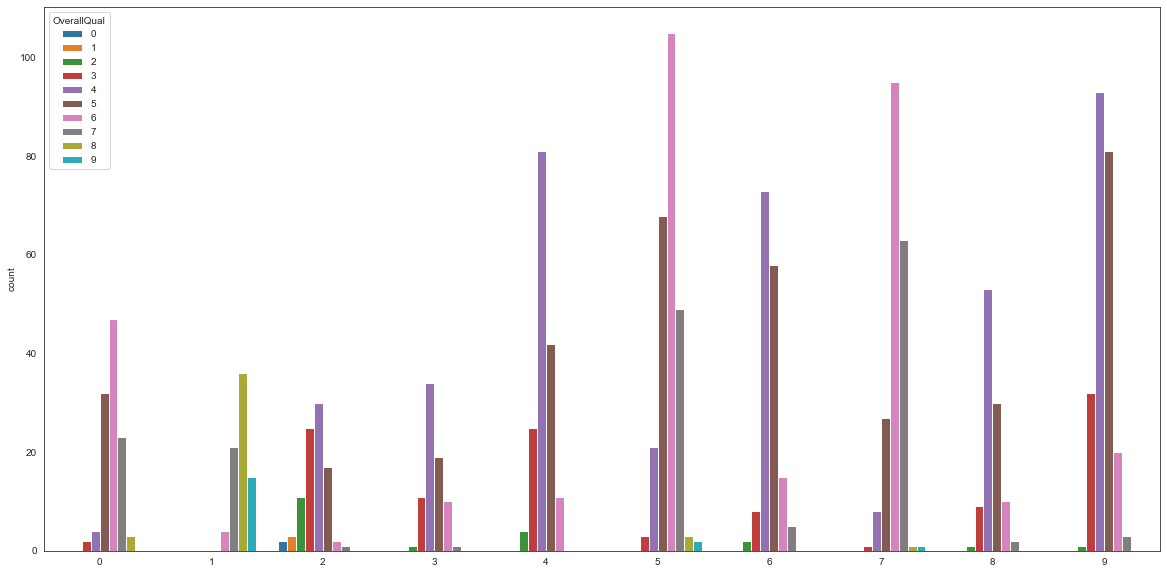

In [386]:
dist_data_df = pd.read_csv("./data/train.csv")
dist_data_df["OverallQual"] = dist_data_df["OverallQual"].map(lambda x: x - 1)

fig = plt.figure(figsize=[20,10])
ax = sns.countplot(x=assigned_clusters, hue="OverallQual", data=dist_data_df)


The data was encoded and scaled before clustering.

The encoded data is passed to KMeans clustering algorithm along with our custom distance function to get clusters.

Some crude techniques were applied at first to check how well the clusters were predicted. Both are bad measures of accuracy of clustering.

Then two scatter plots were drawn by decomposing all the features into 2 dimensions so that a meaningful scatterplot could be drawn by grouping the data points using the selected feature which was finally set to OverallQual.

Initially when the number of clusters was set to 25 = number of distinct neighborhoods, the scatter plots weren't giving any meaningful information.

But, when clustered using OverallQual, the different clusters could somewhat be seen in original data and was easily noticable in predicted clusters' scatter plot.

As neighborhood has the highest correlation with OverallQual, we can somewhat say that the neighborhood boundaries are being obeyed.

In the count plot, the counts of OverallQual for rows with cluster 0,1,2...,9 are shown. Ideally, in each cluster, only one OverallQual value should dominate if we are to assume that our clustering algorithm is clustering based on the OverallQual feature to some extent.

But, as at least only one value is dominating in each predicted cluster, we can say that some data about OverallQual is indeed being captured here. 

## Part 6 - Linear Regression

In [387]:
encoded_df.shape

(1460, 45)

In [388]:
# TODO: code for linear regression

part6_df = pd.read_csv("data/train.csv")

actual_output = part6_df["SalePrice"]

filtered_features = part6_df[["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "1stFlrSF"]]
training_features, testing_features, training_output, testing_output = \
train_test_split(filtered_features, actual_output, test_size = 0.25, random_state = 45)

# print(training_features.shape, training_output.shape)

model = LinearRegression()
model.fit(training_features, training_output)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [389]:
predictions = model.predict(testing_features)

In [390]:
rmse = math.sqrt(np.mean((np.log(predictions) - np.log(testing_output))**2))
print("RMSE value: ", rmse)

RMSE value:  0.2520137194100999


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


The Linear Regression model does not do that bad in terms of RMSE value, which is the measure of error as compared to the main model's RMSE value given below.

The variables which were considered here were all the ones which had a high correlation with SalePrice. So, the predictions are mostly dominated by these variables itself.

OverallQual is the most important variable.

## Part 7 - External Dataset

In [391]:
"""
This dataset consists the Average Weekly Wages for Employees in Total Covered Establishments
from the year 1990 to 2019

"""
external_df = pd.read_csv("./data/external/data.csv")
external_df.columns = ["Date", "Weekly_avg"]

row_count = 0
avg_yearly_wage = {}

while row_count < len(external_df):
    week = 0
    week_avg_per_year = 0
    year = int(external_df.iloc[row_count]["Date"].split("-")[0])
#     print(year)
#     break
    while week < 4 and row_count < len(external_df):
        week_avg_per_year += external_df.iloc[row_count]["Weekly_avg"]
        week += 1
        row_count += 1
    avg_yearly_wage[year] = (week_avg_per_year/week)*52.143

# print(avg_yearly_wage)

In [392]:
"""
Code to map YrSold with Avg_yearly_wage

"""

wage_df = pd.DataFrame(list(avg_yearly_wage.items()), columns = ["YrSold", "Avg_yearly_wage"])
# print(wage_df.head)

external_dataset_df = pd.read_csv("./data/train.csv")

# print(type(external_dataset_df["YrSold"]))

external_dataset_df = pd.merge(external_dataset_df,
                 wage_df, on = "YrSold")

# result[["YrSold", "Avg_yearly_wage"]]
# print(result.columns)


In [393]:
"""
Set this to False if you don't want to use the external dataset in prediction in Part 9
"""
use_external_dataset = False

The dataset consists weekly wages for all employees from the year 1990 to 2019.

We convert the weekly wages into yearly income by taking average of the four weeks' data per year and then multiplying it with the number of weeks in a year. We map the years to the "YrSold" column and check if the yearly income of a person has anything to do with the SalePrice of a house.

The SalePrice should be set by the property owner keeping in mind the yearly income of the propspective buyers of the property.

Hence, the average yearly income should contribute a bit to the prediction of SalePrice.

However, after looking at the "feature_importance" graph for GradientBoostingRegressor, it seems that the model didn't give much importance to "Avg_yearly_wage" for predicting SalePrices of the properties.

After using "Avg_yearly_wage" to predict SalePrice, the RMSE went down to 0.14209 from 0.14149 which was calculated just before including the new column in the dataset on Kaggle.

## Part 8 - Permutation Test

Test RMSE for OverallCond : 0.4195936378333426
Test RMSE for BldgType : 0.42032513118503284
Test RMSE for GarageCars : 0.30999386405186163
Test RMSE for PoolArea : 0.4188471305208266
Test RMSE for RoofStyle : 0.4049923297361623
Test RMSE for Fence : 0.4162195521500772


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:1099: RuntimeWarning: invalid value encountered in greater_equal
  pvalue = (np.sum(permutation_scores >= score) + 1.0) / (n_permutations + 1)


Test RMSE for MiscVal : 0.4192685949097256
Test RMSE for HouseStyle : 0.4166430751860618
Test RMSE for OpenPorchSF : 0.4086014188469341
Test RMSE for CentralAir : 0.37969955719693393


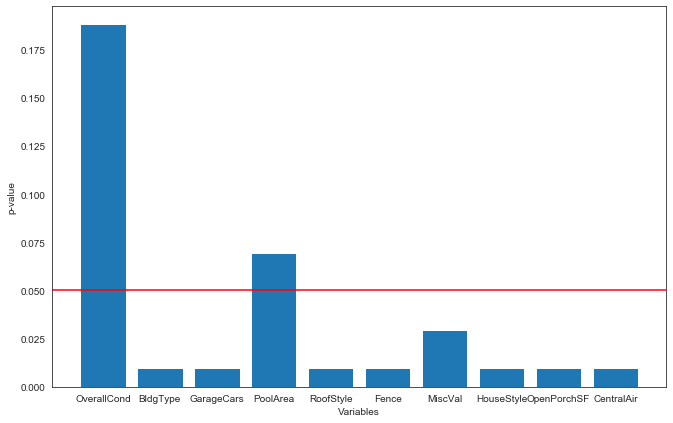

In [394]:
encoded_df = pd.read_csv("./data/train.csv")

for cat in categorical_features:
    encoded_df[cat] = LabelEncoder().fit_transform(encoded_df[cat].astype(str))

def root_mean_square_error(y_true, y_pred):
    rmse = math.sqrt(np.mean((np.log(y_true) - np.log(y_pred))**2))
    return rmse

# print(encoded_df["OverallQual"].unique())

test_variables = ["OverallCond", "BldgType", "GarageCars", "PoolArea", "RoofStyle", \
                  "Fence", "MiscVal", "HouseStyle", "OpenPorchSF", "CentralAir"]

actual_output = encoded_df["SalePrice"].values.reshape(-1, 1)
# print(actual_output)
p_values = {}

for variable in test_variables:

    filtered_features = encoded_df[variable].values.reshape(-1, 1)

    training_features, testing_features, training_output, testing_output = \
    train_test_split(filtered_features, actual_output, test_size = 0.25, random_state = 45)
    
    model = LinearRegression()

    # Greater is better is set to false because we're calculating error and not accuracy
    scoring_fn = make_scorer(root_mean_square_error, greater_is_better=False)
    
    score, permutation_scores, pvalue = permutation_test_score(model, training_features, \
                        training_output, scoring=scoring_fn, cv=5, n_permutations=100, n_jobs=1)
    
    p_values[variable] = round(pvalue, 10)
    
    model.fit(training_features, training_output)

    predictions = model.predict(testing_features)
#     print(type(predictions))
    rmse = math.sqrt(np.mean((np.log(predictions) - np.log(testing_output))**2))

    print("Test RMSE for {} : {}".format(variable, rmse))


plt.figure(figsize=(11, 7))
plt.bar(x = p_values.keys(), height = p_values.values(), align='center')
plt.axhline(0.05, color="Red")
plt.xlabel('Variables')
plt.ylabel('p-value')
plt.show()

# print(p_values)

In [395]:
"""
Old approach for p value calculation

"""
#     model.fit(training_features, training_output)
    
#     predictions = model.predict(testing_features)
    
#     r_square = model.score(filtered_features, actual_output)
# #     print("Variable: {} \t Score: {}".format(variable, r_square))
    
#     pred_mean = predictions.mean()
#     pred_stdev = math.sqrt(np.mean((predictions - testing_output)**2))
    
#     z_score = []
#     # Choose random 100 numbers instead of whole array
#     for index in range(0, len(predictions)):
#          z_score.append((predictions[index] - pred_mean)/pred_stdev)
# #     print(z_score[:5])
#     p_value = norm.sf(max(z_score))
#     var_p_values.append(p_value)

'\nOld approach for p value calculation\n\n'

In [396]:
# from statistics import mean, stdev
# import math
# # convert predictions into Z scores
# # print(type(test_var_predictions[0]))
# for prediction, test_output in zip(test_var_predictions,test_var_testing_outputs):
#     pred_mean = prediction.mean()
#     pred_stdev = math.sqrt(np.mean((prediction - test_output)**2))
# #     print(len(prediction))
#     for index in range(0, len(prediction)):
#         prediction[index] = (prediction[index] - pred_mean)/pred_stdev
# print(test_var_predictions[0][100:110])

The variables considered for p-value test are given in test_variables.

According to the p-value test, the variables that have a p-value more than 0.05 support the null hypothesis and the ones below it reject it.

Hence, OverallCond and PoolArea are not significant variables according to this test for calculation of SalePrice as is showing by the bar graph.

The p-value was calculated by doing 100 random permutations with our custom scoring function (root mean square of error of the log of price).

The RMSE values for the variables supporting the null hypothesis is a bit higher than the variables rejecting it.

This somewhat proves that these variables are not that significant.

In any case, using a single variable Linear Regression model is never a good approach to solve a regression model where the input data depends on more than 80 features.

## Part 9 - Final Result

### First read the train.csv and encode the data along with removing the NaN fields

In [397]:
"""
Old models

"""
# model = Ridge()
# parameters = {"alpha": [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

# ridge_regressor = GridSearchCV(model, parameters, scoring="neg_mean_squared_error", cv=5)

# ridge_regressor.fit(encoded_df, actual_output)

# print(ridge_regressor.best_params_)
# print(ridge_regressor.best_score_)

'\nOld models\n\n'

In [398]:
# model_name = "Linear"
# model = LinearRegression()

# training_features, testing_features, training_output, testing_output = \
# train_test_split(encoded_df, actual_output, test_size = 0.25, random_state = 45)

# print(training_features.shape, training_output.shape)

# model.fit(training_features, training_output)

# # model.fit(encoded_df, actual_output)

In [399]:
# imp_features = ["SalePrice", "OverallQual", "GrLivArea", "1stFlrSF", "2ndFlrSF", "LotArea", "FullBath", "YearBuilt", \
#  "Neighborhood", "BsmtFinType1", "GarageFinish", "YearRemodAdd", "ExterQual", "OverallCond", "TotRmsAbvGrd"]

# encoded_df = encoded_df[imp_features]

In [435]:
"""
Code to run the model for external_dataset_df

"""
if use_external_dataset == True:
    encoded_df = external_dataset_df.copy()
else:
    encoded_df = pd.read_csv("./data/train.csv")

In [436]:
# has_NaN = (pd.isnull(encoded_df).sum() > 0)
# print(has_NaN[has_NaN == True])

"""
Taking is_null from test data to match shape for predictions

"""

is_null = ["Id", "LotFrontage", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", \
           "BsmtHalfBath", "GarageYrBlt","GarageCars","GarageArea","GarageQual","BsmtQual","KitchenQual","FireplaceQu","PoolQC"]

# encoded_df = encoded_df.drop(["LotFrontage", "MasVnrArea", "GarageYrBlt"], axis = 1)
encoded_df = encoded_df.drop(is_null, axis = 1)

print(encoded_df.shape)

(1460, 64)


In [437]:
"""
Encode the categorical variables to be used in the prediction task

"""
for cat in categorical_features:
    if cat not in is_null:
        encoded_df[cat] = LabelEncoder().fit_transform(encoded_df[cat].astype(str))

### Train the regression model on encoded_df

In [438]:
actual_output = encoded_df["SalePrice"]
encoded_df = encoded_df.drop(["SalePrice"], axis = 1)

# scaler = MinMaxScaler()
# encoded_df = scaler.fit_transform(encoded_df)

In [445]:
# params = {
#     'n_estimators': 10,
#     'max_depth': 1,
#     'learning_rate': 1,
#     'criterion': 'mse'
# }

# lasso.fit(X_train,y_train)
# train_score=lasso.score(X_train,y_train)
# test_score=lasso.score(X_test,y_test)

model = GradientBoostingRegressor(n_estimators = 400, random_state = 45, learning_rate = 0.03, max_depth = 4)
# model = Lasso()
# model = xgboost.XGBRegressor(n_estimators=600, learning_rate=0.07, max_depth=4, \
#                               subsample=0.8, reg_alpha=0.70, random_state = 45)

training_features, testing_features, training_output, testing_output = \
train_test_split(encoded_df, actual_output, test_size = 0.25, random_state = 45)

model.fit(training_features, training_output)

predictions = model.predict(testing_features)
rmse = math.sqrt(np.mean((np.log(predictions) - np.log(testing_output))**2))
print("Test RMSE", rmse)

predictions2 = model.predict(training_features)
rmse = math.sqrt(np.mean((np.log(predictions2) - np.log(training_output))**2))
print("\nTrain RMSE", rmse)

# print("Number of features used by Lasso: ", np.sum(model.coef_!=0))


Test RMSE 0.14299177496466878

Train RMSE 0.06434193903443933


In [416]:
"""
Code to save the trained model if needed

"""
# regression_file = "models/regression_model.pkl"

# # save the trained model to a pickle file
# joblib.dump(model, regression_file)

# # load the saved trained model
# # model = joblib.load(regression_file)

'\nCode to save the trained model if needed\n\n'

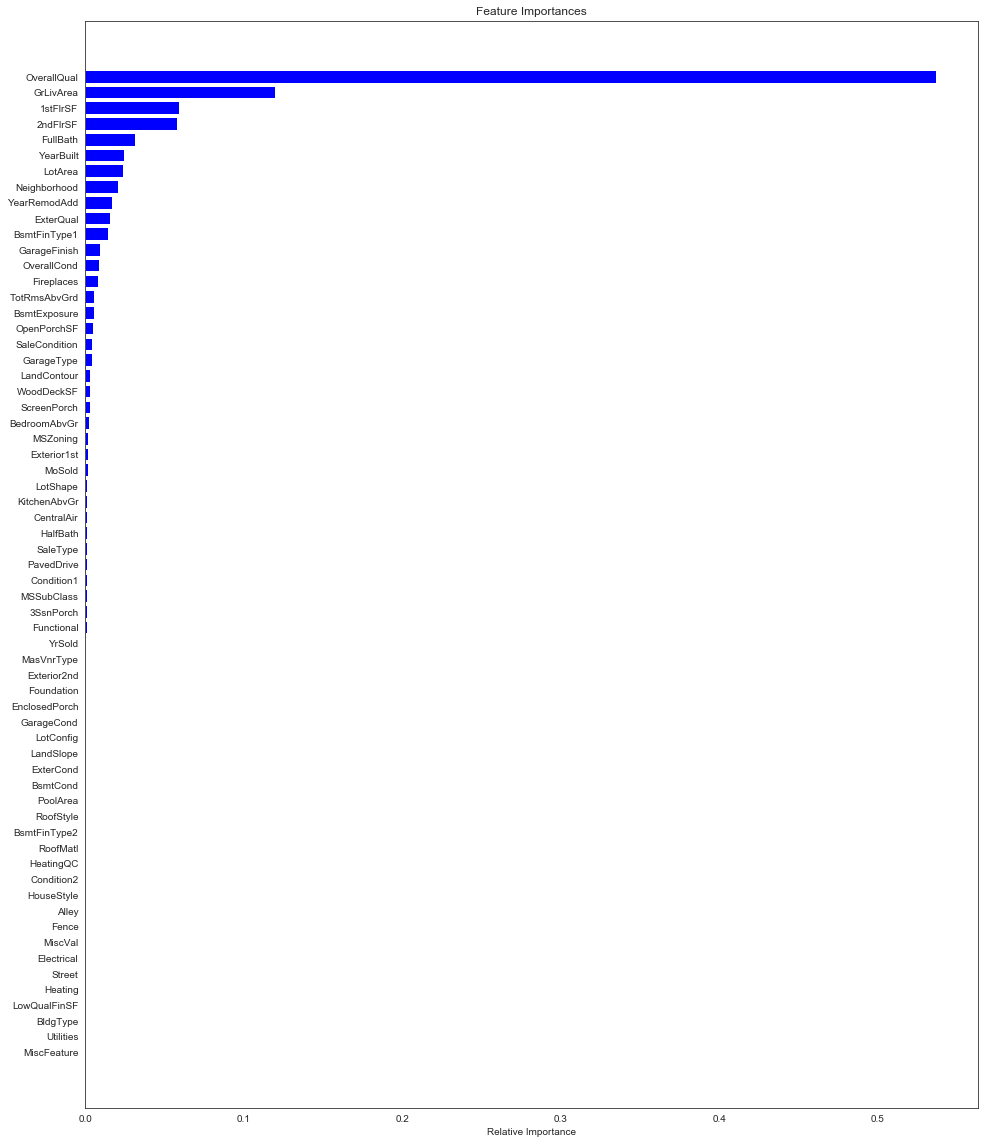

In [446]:
plt.figure(figsize=(16, 20))
features = encoded_df.columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Preprocess and remove NaN from Test data

In [447]:
encoded_df = pd.read_csv("./data/test.csv")

In [448]:
"""
Check if there are any NaN values in test data

"""
# test = (pd.isnull(encoded_df).sum() > 0)
# print(test[test == True])

# print(encoded_df.shape)

'\nCheck if there are any NaN values in test data\n\n'

In [449]:
"""
is_null has all the variables having a NaN in them in test data

"""
# is_null = ["Id", "LotFrontage", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", \
#            "BsmtHalfBath", "GarageYrBlt","GarageCars","GarageArea","GarageQual","BsmtQual","KitchenQual","FireplaceQu","PoolQC"]

"""
Replace the NaN in the encoded categorical variables and numeric ones with their mean values

"""

# for var in is_null:
#     test_df[var].fillna(test_df[var].mean(), inplace=True)

'\nReplace the NaN in the encoded categorical variables and numeric ones with their mean values\n\n'

In [450]:
if use_external_dataset == True:
    encoded_df = pd.merge(encoded_df, wage_df, on = "YrSold")

In [451]:
for cat in categorical_features:
    if cat not in is_null:
        encoded_df[cat] = LabelEncoder().fit_transform(encoded_df[cat].astype(str))

In [452]:
encoded_df = encoded_df.drop(is_null, axis = 1)

test = (pd.isnull(encoded_df).sum() > 0)
print(test[test == True])

Series([], dtype: bool)


In [453]:
encoded_df.shape

(1459, 63)

### Here the test data has finished preprocessing and we can start predictions


In [454]:
# predictions = model.predict(test_df)
predictions = model.predict(encoded_df)

In [455]:
print(predictions.shape)

(1459,)


In [456]:
# submission_csv = encoded_df.copy()

submission_csv = pd.read_csv("./data/sample_submission.csv")

pred = pd.DataFrame(predictions, columns=["SalePrice"])

submission_csv = pd.concat([submission_csv["Id"], pred], axis=1)

# print(submission_csv["Id"].head)
model_name = "Gradient_Boost"
# model_name = "Lasso"
# model_name = "xgb"
count = 10

In [457]:
submission_csv = submission_csv.to_csv("submissions/submission_" + model_name + "_" + str(count) + ".csv",\
                                       index = None, header=True)

The models tried here were -
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. XGBoost
5. Gradient Boosting Regressor

GridSearchCV was used to find the best fit parameters for Ridge which helped with the RMSE score a bit.

The code for using external dataset is in this section.

The model was trained on all the features which didn't have any NaN values in them, in both, the train as well as the test data. The NaN columns were more in test data which are stored in "is_null" array.

After Label encoding the features, the regression model was trained after trying out various different combinations of multiple hyper parameters.

The main approach was usually to increase the n_estimators while decreasing the learning rate and tweaking different parameters along with them. The subsample parameter is used to reduce the overfitting of the model which is never a good thing.

The random_state value was set to 45 in all cases to better judge the changes in the model. Otherwise, the train_test_split would've given a new training/testing data split and we wouldn't be able to judge the changes made to the hyper parameters efficiently.

The difference between Train and Test RMSE values helps in telling if a model is overfitting to the training data or not. If the train values are good but it doesn't do so well on testing features, then the model is overfitting.

The feature importance graph is a great way of getting to know which variables the model is giving the most importance to.

In the case of Lasso regression, the number of features/columns it uses for prediction can be found out.

## Part 10 - Kaggle Score

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/adityagaikwad

Highest Rank: 2115

Score: 0.13365

Number of entries: 16

IMAGE OF KAGGLE RANKING:
![Kaggle Rank](Kaggle_Rank.png "Kaggle Rank")


References:
1. https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python
2. https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
3. https://scikit-learn.org/stable/auto_examples/feature_selection/plot_permutation_test_for_classification.html
4. https://www.dummies.com/programming/big-data/data-science/how-to-visualize-the-clusters-in-a-k-means-unsupervised-learning-model/
5. https://fred.stlouisfed.org/series/ENUC111840010SA

Discussed with:

1. Abha Mutalik
2. Jainam Soni